In [1]:
pip install keras

In [ ]:
pip install scikit-image

In [ ]:
pip install tensorflow==2.2.0

In [ ]:
import tensorflow as tf
tf.__version__

In [1]:
import sys, os
import pandas as pd
import numpy as np
from PIL import Image

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

from skimage import io
from tensorflow.keras.preprocessing import image
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df=pd.read_csv('fer2013.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35340 entries, 0 to 35339
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35340 non-null  int64 
 1   Usage    35340 non-null  object
 2   pixels   35340 non-null  object
dtypes: int64(1), object(2)
memory usage: 828.4+ KB
None


In [5]:
print(df)

       emotion        Usage                                             pixels
0            0     Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0     Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            1     Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            3     Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            5     Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...          ...                                                ...
35335        5  PrivateTest  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35336        2  PrivateTest  178 174 172 173 181 188 191 194 196 199 200 20...
35337        0  PrivateTest  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35338        2  PrivateTest  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35339        1  PrivateTest  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...

[35340 rows x 3 columns]


In [6]:
print(df.head())
print(df.columns)

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        1  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        3  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        5  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Index(['emotion', 'Usage', 'pixels'], dtype='object')


In [7]:
print(df["Usage"].value_counts())


Training       28273
PrivateTest     3534
PublicTest      3533
Name: Usage, dtype: int64


<AxesSubplot:>

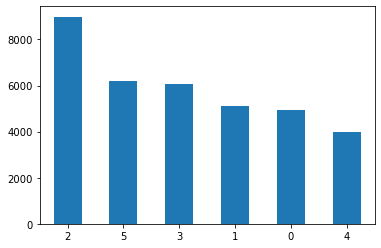

In [8]:
df['emotion'].value_counts().plot.bar(rot=0)

In [9]:
X_train,train_y,X_test,test_y=[],[],[],[]


In [10]:
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    if 'Training' in row['Usage']:
        X_train.append(np.array(val,'float32'))
        train_y.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
        X_test.append(np.array(val,'float32'))
        test_y.append(row['emotion'])
        

In [11]:
num_features = 64
num_labels = 6
batch_size = 256
epochs = 80
width, height = 48, 48

In [12]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [13]:
print(X_train.shape)
print(X_test.shape)

(28273, 2304)
(3533, 2304)


In [14]:
oversample = RandomOverSampler(sampling_strategy='auto')

X_train, train_y = oversample.fit_resample(X_train.reshape(X_train.shape[0],48*48), train_y)

print(X_train.shape)


(43290, 2304)


In [15]:
X_train = np.array(X_train, 'float32')
train_y = np.array(train_y, 'float32')

X_test = np.array(X_test, 'float32')
test_y = np.array(test_y, 'float32')


X_train = X_train/255
X_test = X_test/255

In [16]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

In [17]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [18]:
print(f"shape:{X_train.shape}")
print(f"shape:{X_test.shape}")

shape:(43290, 48, 48, 1)
shape:(3533, 48, 48, 1)


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(32, kernel_size=3, activation='relu', padding = 'same', input_shape=(X_train.shape[1:])))
#kernel (3,3)
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size= 3, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#stride = (2,2)
model.add(Dropout(0.2))

In [21]:
model.add(Conv2D(64, 3, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

In [22]:
model.add(Conv2D(128, 3, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.3))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))


In [25]:
model.add(Dense(num_labels, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [27]:
dgen = ImageDataGenerator(validation_split = 0.2, rotation_range=10, horizontal_flip=True)
train_data = dgen.flow(X_train, train_y, batch_size=batch_size, subset='training', shuffle=True)
val_data = dgen.flow(X_test, test_y, batch_size=batch_size, subset='validation', shuffle=True)

In [28]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=7, factor=0.7, min_denta=1e-7)
# factor = 0.5

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [30]:
model.fit(train_data,
          epochs=epochs,
          validation_data=val_data,
          callbacks=[es, reduce_lr],
          shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 136 steps, validate for 3 steps
Epoch 1/80
136/136 [==============================] - 391s 3s/step - loss: 1.8884 - accuracy: 0.2652 - val_loss: 1.8959 - val_accuracy: 0.1728
Epoch 2/80
136/136 [==============================] - 392s 3s/step - loss: 1.5406 - accuracy: 0.3627 - val_loss: 1.8611 - val_accuracy: 0.1898
Epoch 3/80
136/136 [==============================] - 390s 3s/step - loss: 1.3856 - accuracy: 0.4400 - val_loss: 1.6228 - val_accuracy: 0.3499
Epoch 4/80
136/136 [==============================] - 398s 3s/step - loss: 1.2794 - accuracy: 0.4920 - val_loss: 1.3557 - val_accuracy: 0.4660
Epoch 5/80
136/136 [==============================] - 395s 3s/step - loss: 1.2040 - accuracy: 0.5262 - val_loss: 1.1880 - val_accuracy: 0.5425
Epoch 6/80
136/136 [==============================] - 343s 3s/step - loss: 1.1512 - accuracy: 0.5511 - val_loss: 1.1221 - val_accuracy: 0.5807
Epoch 7/80
136/136 [==============================

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [70]:
emotions = {0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Sad', 4: 'Surprise', 5: 'Neutral'}

In [71]:
img = image.load_img('happy1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('happy1.jpg', target_size=(200, 200))

In [72]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

In [35]:
# def emotion_analysis(emotions):
#     objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
#     y_pos = np.arange(len(objects))
#     plt.bar(y_pos, emotions, align='center', alpha=0.9)
#     plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
    
# plt.show()

In [73]:
def emotion_analysis(emotions):
    objects = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

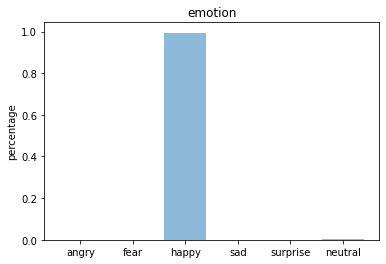

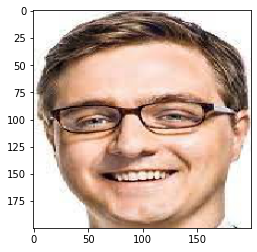

In [74]:
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

In [75]:
def process_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    
    return x

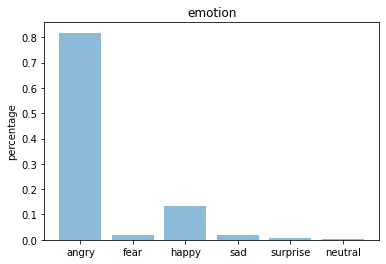

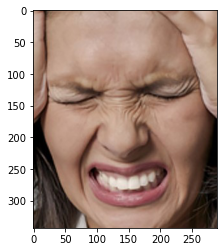

Actual emotion: Angry
Prediction emotion:  Angry


In [76]:
img = image.load_img('angry1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('angry1.jpg'))
plt.show()
print("Actual emotion: Angry")
print("Prediction emotion: ", emotions[np.argmax(pred)])

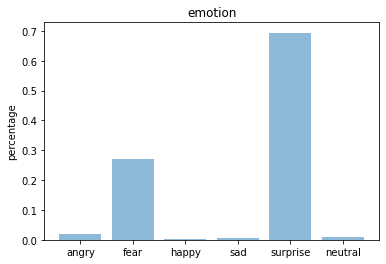

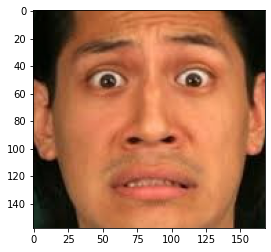

Actual emotion: Fear
Prediction emotion:  Surprise


In [77]:
img = image.load_img('fear1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('fear1.jpg'))
plt.show()
print("Actual emotion: Fear")
print("Prediction emotion: ", emotions[np.argmax(pred)])

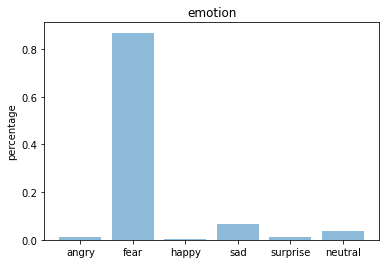

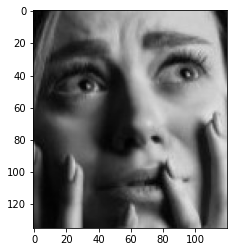

Actual emotion: Fear
Prediction emotion:  Fear


In [92]:
img = image.load_img('feary1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('feary1.jpg'))
plt.show()
print("Actual emotion: Fear")
print("Prediction emotion: ", emotions[np.argmax(pred)])

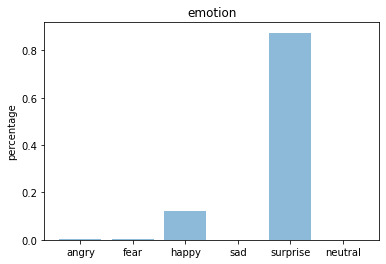

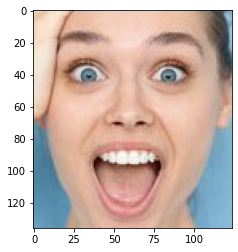

Actual emotion: Surprise
Prediction emotion:  Surprise


In [78]:
img = image.load_img('surprise1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('surprise1.jpg'))
plt.show()
print("Actual emotion: Surprise")
print("Prediction emotion: ", emotions[np.argmax(pred)])

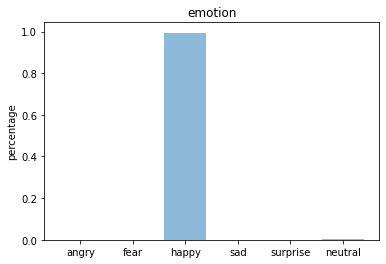

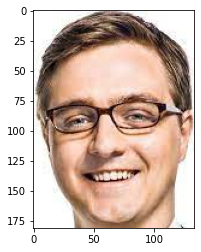

Actual emotion: Happy
Prediction emotion:  Happy


In [79]:
img = image.load_img('happy1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('happy1.jpg'))
plt.show()
print("Actual emotion: Happy")
print("Prediction emotion: ", emotions[np.argmax(pred)])

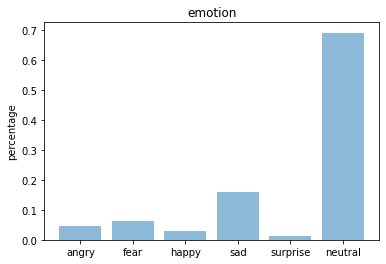

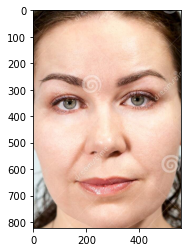

Actual emotion: Neutral
Prediction emotion:  Neutral


In [89]:
img = image.load_img('neut1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('neut1.jpg'))
plt.show()
print("Actual emotion: Neutral")
print("Prediction emotion: ", emotions[np.argmax(pred)])

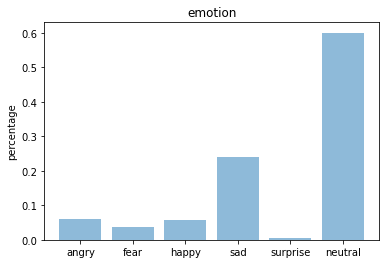

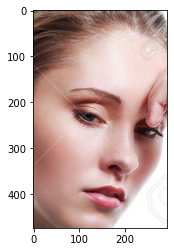

Actual emotion: Sad
Prediction emotion:  Neutral


In [91]:
img = image.load_img('sad1.jpg', grayscale=True, target_size=(48,48))
x = process_image(img)
pred = model.predict(x)
emotion_analysis(pred[0])

plt.imshow(image.load_img('sad1.jpg'))
plt.show()
print("Actual emotion: Sad")
print("Prediction emotion: ", emotions[np.argmax(pred)])

In [37]:
m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: happy


In [38]:
print(custom[0])

[1.3050777e-03 5.5949997e-05 9.9427599e-01 1.1813761e-04 4.1991061e-05
 4.2029261e-03]


In [39]:
img = image.load_img('Surprise1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('Surprise1.jpg', target_size=(200, 200))

In [40]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

In [41]:
m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: surprise


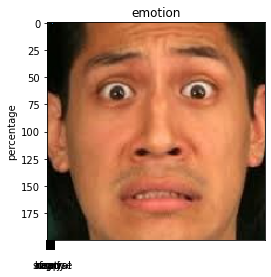

Prediction emotion:  Surprise


In [42]:
img = image.load_img('fear1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('fear1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

emotion_analysis(custom[0])

plt.imshow(show_img)
plt.show()
print("Prediction emotion: ", emotions[np.argmax(custom)])


# m=0.0000000000000000000001
# a=custom[0]
# for i in range(0,len(a)):
#     if a[i]>m:
#         m=a[i]
#         ind=i
# objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# print('Expression Prediction:',objects[ind])

In [43]:
img = image.load_img('sad1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('sad1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: neutral


In [44]:
img = image.load_img('anger1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('anger1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: angry


In [45]:
img = image.load_img('neutral1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('neutral1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: angry


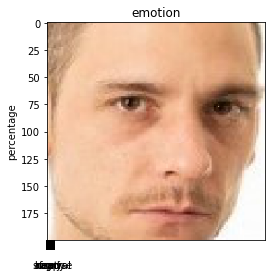

In [46]:
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

In [47]:
img = image.load_img('angry1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('angry1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: angry


In [48]:
img = image.load_img('neut1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('neut1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: neutral


In [50]:
img = image.load_img('feary.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('feary.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.0000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print('Expression Prediction:',objects[ind])

Expression Prediction: fear


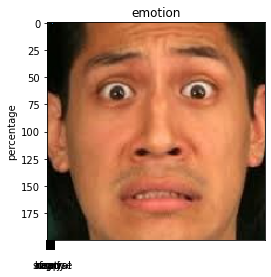

Prediction emotion:  Surprise


In [51]:
img = image.load_img('fear1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('fear1.jpg', target_size=(200, 200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

emotion_analysis(custom[0])

plt.imshow(show_img)
plt.show()
print("Prediction emotion: ", emotions[np.argmax(custom)])

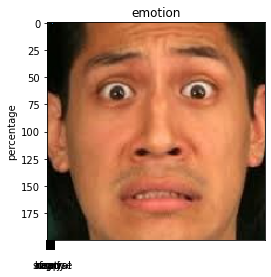

In [52]:
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

In [82]:
fer_json = model.to_json()
with open("FER.json", "w") as json_file:
    json_file.write(fer_json)
model.save("fer.h5")